## THE BEHAVIOR OF THE FEAR NETWORK COULD BE AFFECTED BY THE INTENSITY OF THE STIMULUS AND THE INTEGRITY OF THE NETWORK

In [1]:
from netpyne import specs, sim

In [2]:
tstop = 1000.0

arq = './KimEtAl2013/LAcells_template.hoc'
arq2 = './KimEtAl2013/interneuron_template.hoc'

# Network parameters
netParams = specs.NetParams() # object of class NetParams to store the network parameters
## Population parameter
netParams.popParams['A_pop'] = {'cellType': 'A', 'numCells': 5, 'cellModel': 'HH'}
netParams.popParams['B_pop'] = {'cellType': 'B', 'numCells': 5, 'cellModel': 'HH'}
netParams.popParams['C_pop'] = {'cellType': 'C', 'numCells': 5, 'cellModel': 'HH'}
netParams.popParams['IN_pop'] = {'cellType': 'Interneuron', 'numCells': 5, 'cellModel': 'HH'}

In [3]:
### Import A
netParams.importCellParams(label='A_rule', conds={'cellType': 'A', 'cellModel': 'HH'},	fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='B_rule', conds={'cellType': 'B', 'cellModel': 'HH'},	fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='C_rule', conds={'cellType': 'C', 'cellModel': 'HH'},	fileName=arq, cellName='Cell_C', importSynMechs=True)
## Import interneurons
netParams.importCellParams(label='IN_rule', conds={'cellType': 'Interneuron', 'cellModel': 'HH'}, fileName=arq2, cellName='InterneuronCell', importSynMechs=True)

{conds: {cellType: 'Interneuron', cellModel: 'HH'}, secs: {soma: {geom: {L: 15.0, nseg: 1, diam: 15.0, Ra: 3375.0, cm: 1.0}, topol: {}, mechs: {kdrinter: {gkdrbar: 0.008}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.035}}, ions: {k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}, dend: {geom: {L: 150.0, nseg: 1, diam: 10.0, Ra: 150.0, cm: 1.0}, topol: {parentSec: 'soma', parentX: 1.0, childX: 0.0}, mechs: {kdrinter: {gkdrbar: 0.003}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.01}}, ions: {ca: {e: 120.0, i: 5e-05, o: 2.0}, k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}}, secLists: {}, globals: {}, _repr_mimebundle_: {}}

In [4]:
## Synaptic mechanism
netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0} # soma NMDA synapse

In [5]:
# Stimulation
#netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 20, 'noise': 0.5}
netParams.stimSourceParams['bkg'] = {'type': 'IClamp', 'amp': 0.4, 'delay': 100, 'dur': 700 }
netParams.stimTargetParams['bkg->A'] = {'source': 'bkg', 'conds': {'cellType': 'A'}, 'sec': 'soma', 'loc':0.5} #'weight': 0.5,'delay': 5,
netParams.stimTargetParams['bkg->B'] = {'source': 'bkg', 'conds': {'cellType': 'B'}, 'sec': 'soma', 'loc': 0.5}
netParams.stimTargetParams['bkg->C'] = {'source': 'bkg', 'conds': {'cellType': 'C'}, 'sec': 'soma', 'loc':0.5}
netParams.stimTargetParams['bkg->Interneuron'] = {'source': 'bkg', 'conds': {'cellType': 'Interneuron'}, 'sec': 'soma', 'loc'  :0.5}

In [6]:
'''## Connectivity params
netParams.connParams['A->ADA'] = {'preConds': {'cellType': 'Cell_A'}, 'postConds': {'cellType': 'Cell_ADA'}, # A -> ADA random
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma', 'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50, 'RLon': 1, 'tauhebb': 10}}}'''

"## Connectivity params\nnetParams.connParams['A->ADA'] = {'preConds': {'cellType': 'Cell_A'}, 'postConds': {'cellType': 'Cell_ADA'}, # A -> ADA random\n                    'probability': 0.5,  # max number of incoming conns to cell\t'\n                    'weight': 0.02,  # synaptic weight\n                    'delay': 5, # transmission delay (ms) '\n                    'sec': 'soma', 'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50, 'RLon': 1, 'tauhebb': 10}}}"

In [10]:
# section to connect to# Simulation options
simConfig = specs.SimConfig() # object of class SimConfig to store simulation configuration
simConfig.duration = tstop#1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = 0
simConfig.hParams = {'celsius':31}

In [13]:
# Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}
# Dict with traces to record
simConfig.recordStep = 0.01
# Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'
# Set file output names
simConfig.saveJson = True


Creating network of 4 cell populations on 1 hosts...
Distributed population of 5 cells on 1 hosts: {0: [0, 1, 2, 3, 4]}, next: 0
Cell 0/4 (gid=0) of pop A_pop, on node 0, 
Cell 1/4 (gid=1) of pop A_pop, on node 0, 
Cell 2/4 (gid=2) of pop A_pop, on node 0, 
Cell 3/4 (gid=3) of pop A_pop, on node 0, 
Cell 4/4 (gid=4) of pop A_pop, on node 0, 
Instantiated 5 cells of population A_pop
Distributed population of 5 cells on 1 hosts: {0: [0, 1, 2, 3, 4]}, next: 0
Cell 0/4 (gid=5) of pop B_pop, on node 0, 
Cell 1/4 (gid=6) of pop B_pop, on node 0, 
Cell 2/4 (gid=7) of pop B_pop, on node 0, 
Cell 3/4 (gid=8) of pop B_pop, on node 0, 
Cell 4/4 (gid=9) of pop B_pop, on node 0, 
Instantiated 5 cells of population B_pop
Distributed population of 5 cells on 1 hosts: {0: [0, 1, 2, 3, 4]}, next: 0
Cell 0/4 (gid=10) of pop C_pop, on node 0, 
Cell 1/4 (gid=11) of pop C_pop, on node 0, 
Cell 2/4 (gid=12) of pop C_pop, on node 0, 
Cell 3/4 (gid=13) of pop C_pop, on node 0, 
Cell 4/4 (gid=14) of pop C_pop

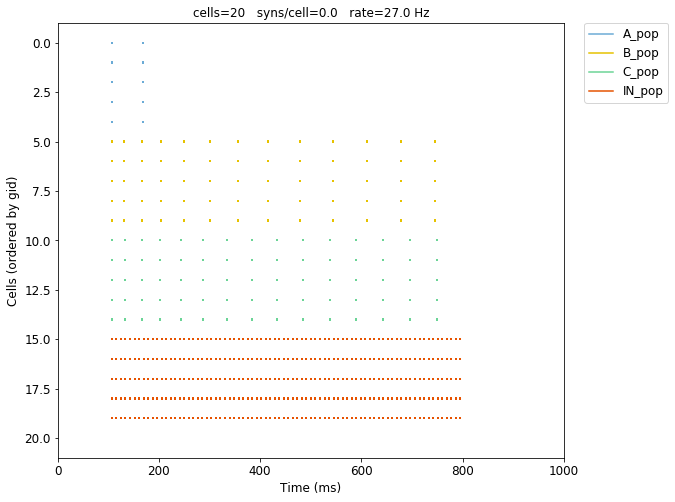

Plotting recorded cell traces ... cell


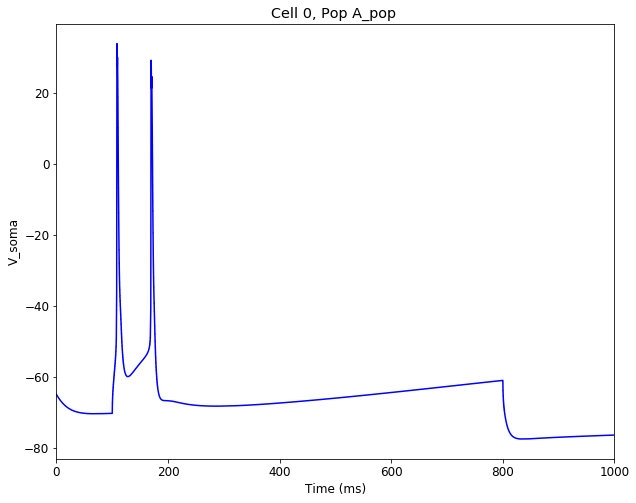

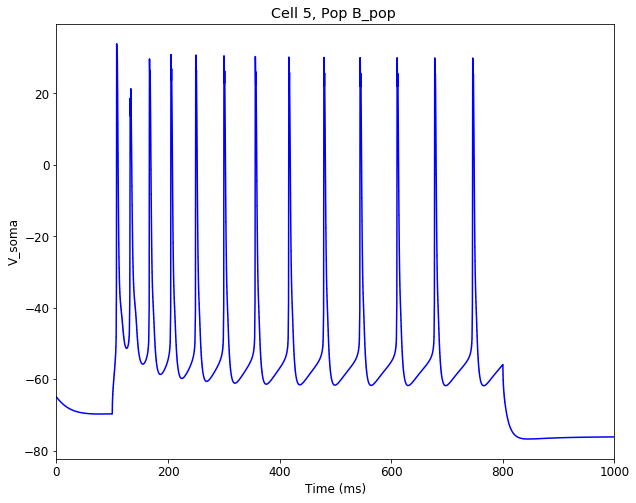

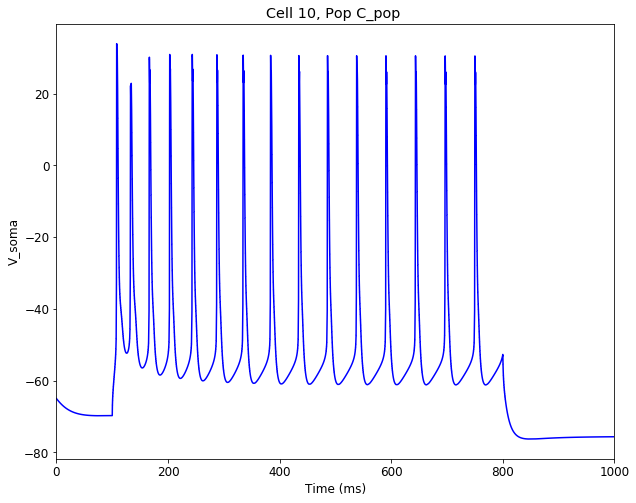

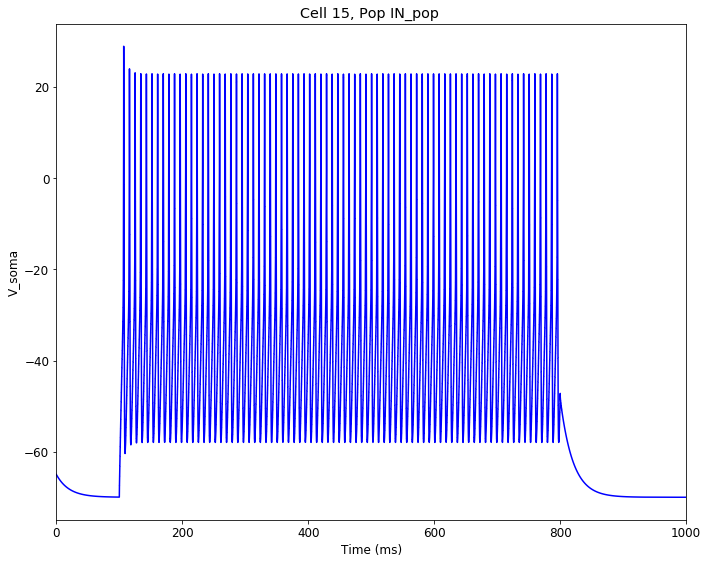

  Done; plotting time = 1.53 s

Total time = 6.60 s


In [14]:
# Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}
# Plot a raster
simConfig.analysis['plotTraces'] = {'include': [0,5,10,15]}
# Plot recorded traces for this list of cells
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)